As per year 2015 and 2016
*********************************************
# Is Fandango still inflating movie ratings?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis in this [article.](https://fivethirtyeight.com/features/fandango-movies-ratings/)

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:
*   The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
*   In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
*   For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

## Objective : 
We'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Solution:
One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

*   Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

*  We have ratings for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd
fandango_score = pd.read_csv("fandango_score_comparison.csv")
movie_16_17 = pd.read_csv("movie_ratings_16_17.csv")

In [3]:
pd.options.display.max_columns = 99
fandango_score.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [5]:
movie_16_17.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [6]:
cols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
fandango = fandango_score.copy()
fandango = fandango[cols]

In [7]:
fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
movie = movie_16_17[['movie', 'year', 'fandango']].copy()

In [9]:
movie.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [10]:
fandango_before = fandango.copy()
fandango_after = movie.copy()

In [11]:
fandango_before.shape

(146, 5)

In [12]:
fandango_after.shape

(214, 3)

In [13]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [14]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.
 
 Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.
 
 The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.
 
 From Hickey's article and from the `README.md` of [the data set's repository](https://github.com/fivethirtyeight/data/tree/master/fandango), we can see that he used the following sampling criteria:
 
 * The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
 * The movie must have had tickets on sale in 2015.
 
 The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to *temporal trends* — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.
 
 The sampling conditions for our other sample were (as it can be read in the `README.md` of [the data set's repository](https://github.com/mircealex/Movie_ratings_2016_17)):
 
 * The movie must have been released in 2016 or later.
 * The movie must have had a considerable number of votes and reviews (unclear how many from the `README.md` or from the data).
 
 This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.
 
 Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called [**purposive sampling**](https://youtu.be/CdK7N_kTzHI) (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.
 
# Changing the Goal of our Analysis

 At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.
 
 Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.
 
 # Isolating the Samples We Need

 With this new research goal, we have two populations of interest:
 
 1. All Fandango's ratings for popular movies released in 2015.
 2. All Fandango's ratings for popular movies released in 2016.
 
 We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.
 
 Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).
 
 One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.


In [18]:
fandango_before.sample(n=10, random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


Movies displayed above are popular movies as the vote count is greater than 30, which was also the criteria used by Walt Hickey.

In [19]:
fandango_after.sample(n=10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


## Isolating movies by year 2015 and 2016:

In [20]:
fandango_after.columns

Index(['movie', 'year', 'fandango'], dtype='object')

In [21]:
fandango_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [22]:
fandango_2016=fandango_after[fandango_after["year"]==2016]

In [23]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [24]:
fandango_before.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')

In [25]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [27]:
fandango_before["Year"] = fandango_before["FILM"].str[-5:-1]

In [29]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [30]:
fandango_before["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [32]:
fandango_2015 = fandango_before[fandango_before["Year"]=="2015"]

In [33]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [37]:
fandango_2015["Year"] = fandango_2015["Year"].astype(int)

C:\Users\1202565\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
fandango_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 6 columns):
FILM                    129 non-null object
Fandango_Stars          129 non-null float64
Fandango_Ratingvalue    129 non-null float64
Fandango_votes          129 non-null int64
Fandango_Difference     129 non-null float64
Year                    129 non-null int32
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 6.6+ KB


## Analysis both datasets for 2015 and 2016:
Determining whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

In [39]:
import matplotlib.pyplot as plt

In [40]:
fandango_2015.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference', 'Year'],
      dtype='object')

In [41]:
fandango_2016.columns

Index(['movie', 'year', 'fandango'], dtype='object')

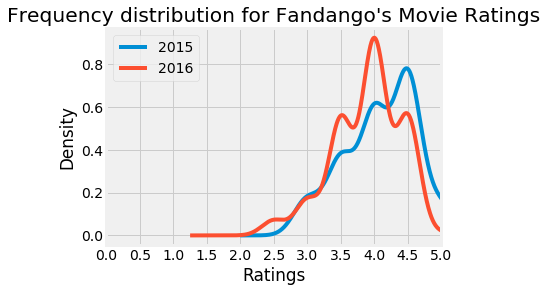

In [42]:
import numpy as np
fig = plt.figure()
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde( label="2015")
fandango_2016["fandango"].plot.kde(label="2016")
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.legend()
plt.title("Frequency distribution for Fandango's Movie Ratings")
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,0.5))
plt.show()

**Below points we can conclude by seeing above plot:**
* Both the plots above are strongly left skewed.
* We can see that the graph has shown some shift towards left from year 2015 to 2016. The plots are made for popular movies.
* We can find that in 2015 most of popular movies had rating 4.5, but this has decreased in year 2016. In year most of the popular movies have rating 4. This implies that there is surely some correction in Fandango's website's overall rating calculation.
* The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

` The kernel density plots from the previous screen showed that there's a clear difference between the two distributions. They also provided us with information about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.`

## Examining frequency distribution:

#### For year 2015:

In [44]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True)*100

4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
5.0     6.976744
Name: Fandango_Stars, dtype: float64

#### For year 2016:

In [45]:
fandango_2016['fandango'].value_counts(normalize=True)*100

4.0    40.314136
4.5    24.607330
3.5    24.083770
3.0     7.329843
2.5     3.141361
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Generating Summary Statistics:

In [93]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
median_2015 = fandango_2015['Fandango_Stars'].median()
(mean_2015,median_2015,mode_2015)

(4.0852713178294575, 4.0, 4.5)

In [94]:
mean_2016 = fandango_2016['fandango'].mean()
mode_2016 = fandango_2016['fandango'].mode()[0]
median_2016 = fandango_2016['fandango'].median()
(mean_2016,mode_2016,median_2016)

(3.887434554973822, 4.0, 4.0)

In [97]:
summary = pd.DataFrame()

summary["2015"] = [mean_2015,median_2015,mode_2015]
summary["2016"] = [mean_2016,median_2016,mode_2016]

summary.index = ["mean","median","mode"]

In [98]:
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


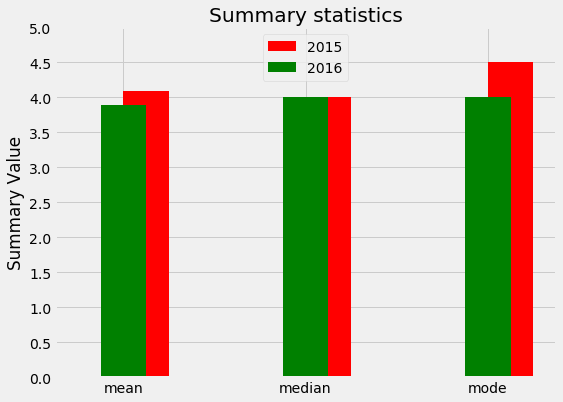

In [129]:
fig = plt.figure(figsize=(8,6))
#plt.style.use('fivethirtyeight')
summary["2015"].plot.bar(color="red", align="edge",width=0.25, label="2015")
summary["2016"].plot.bar(color="green",width=0.25, rot=0, label="2016",align="center")
plt.ylabel("Summary Value")
plt.title("Summary statistics")
plt.legend(loc="upper center")
plt.yticks(np.arange(0,5.1,0.5))
plt.show()

In [128]:
mean_diff = mean_2015 - mean_2016
mode_diff = mode_2015 - mode_2016
(mean_diff,mode_diff)

(0.19783676285563567, 0.5)

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Along with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion:

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

Mode above we calculated clearly shows that in year 2015, there were more 4.5 rated movies. While in year 2016, there are more 4 rated movies. This mean, there is definitly some improvement in system of Fandango. But we can't be so much sure as we can't see the rounding technique Fandango is following now, as ratings can't be seen using HTML tag.